# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST/MNIST\raw\train-images-idx3-ubyte.gz to MNIST/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting MNIST/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST/MNIST\raw

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [4]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


c:\Users\mlva\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\datasets\mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [5]:
model = torch.nn.Linear(28*28, 10)

In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.2664, -0.7200,  0.3530, -0.8231,  0.4419, -0.6691, -0.2157, -0.1855,
         -0.2734,  0.3452]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [7]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [9]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k, (x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        
        # Adiciona print
        print(f'Época: {i + 1}/{n_epochs}, Batch: {k + 1}/{n_batches_train}, Loss: {loss.item():.4f}')

Época: 1/5, Batch: 1/600, Loss: 0.2659
Época: 1/5, Batch: 2/600, Loss: 0.2132
Época: 1/5, Batch: 3/600, Loss: 0.2616
Época: 1/5, Batch: 4/600, Loss: 0.2222
Época: 1/5, Batch: 5/600, Loss: 0.3975
Época: 1/5, Batch: 6/600, Loss: 0.2710
Época: 1/5, Batch: 7/600, Loss: 0.3449
Época: 1/5, Batch: 8/600, Loss: 0.2649
Época: 1/5, Batch: 9/600, Loss: 0.1274
Época: 1/5, Batch: 10/600, Loss: 0.2265
Época: 1/5, Batch: 11/600, Loss: 0.4895
Época: 1/5, Batch: 12/600, Loss: 0.1861
Época: 1/5, Batch: 13/600, Loss: 0.2390
Época: 1/5, Batch: 14/600, Loss: 0.2260
Época: 1/5, Batch: 15/600, Loss: 0.5505
Época: 1/5, Batch: 16/600, Loss: 0.2221
Época: 1/5, Batch: 17/600, Loss: 0.2254
Época: 1/5, Batch: 18/600, Loss: 0.3091
Época: 1/5, Batch: 19/600, Loss: 0.4438
Época: 1/5, Batch: 20/600, Loss: 0.1734
Época: 1/5, Batch: 21/600, Loss: 0.1828
Época: 1/5, Batch: 22/600, Loss: 0.2020
Época: 1/5, Batch: 23/600, Loss: 0.2618
Época: 1/5, Batch: 24/600, Loss: 0.1772
Época: 1/5, Batch: 25/600, Loss: 0.1862
Época: 1/

In [10]:
print('Final loss:', loss.data)

Final loss: tensor(0.2730)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

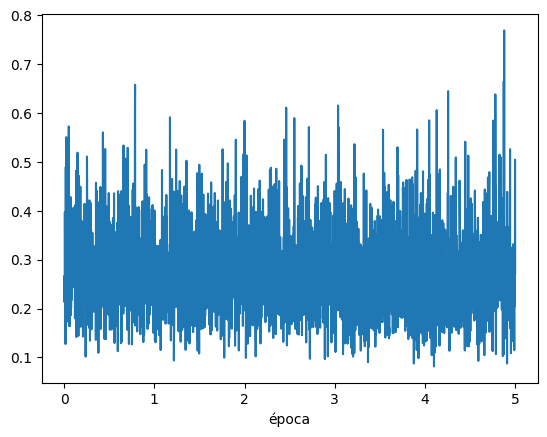

In [11]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

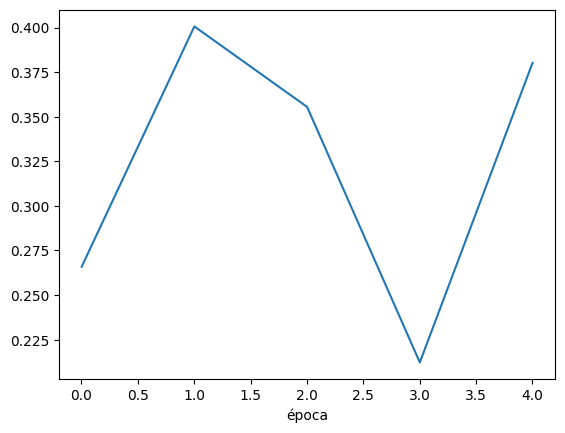

In [12]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

Perguntas

Qual é o tamanho do mini-batch?

    O tamanho do mini-batch é definido pelo batch_size, que neste caso é 100.

Em uma época, quantos mini-batches existem?

    O número de mini-batches é dado pelo total de amostras de treinamento dividido pelo tamanho do mini-batch. Para o MNIST, que tem 60.000 imagens no conjunto de treinamento, isso resulta em:

    n de mini-batches = 60000 / 100 = 600

    Portanto, há 600 mini-batches por época.

Qual é a definição de época?

    Uma época é uma passada completa por todas as amostras de treinamento no conjunto de dados. No caso de mini-batches, uma época corresponde ao processamento de todos os mini-batches.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.


Treinando com batch_size = 32

Treinando com batch_size = 64

Treinando com batch_size = 128

Treinando com batch_size = 256


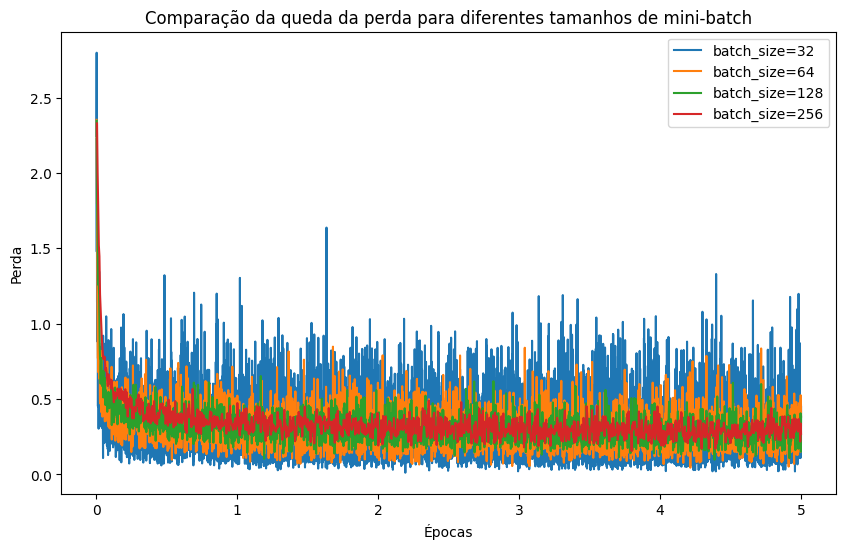

In [14]:
batch_sizes = [32, 64, 128, 256]
losses_per_batch_size = {}
epochs_per_batch_size = {}

for batch_size in batch_sizes:
    print(f'\nTreinando com batch_size = {batch_size}')
    loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    n_batches_train = len(loader_train)
    model = torch.nn.Linear(28 * 28, 10)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    losses = []
    epochs = []
    total_trained_samples = 0

    # Loop de treinamento
    for i in range(n_epochs):
        for k, (x_train, y_train) in enumerate(loader_train):
            inputs = Variable(x_train.view(-1, 28 * 28))
            outputs = model(inputs)
            loss = criterion(outputs, Variable(y_train))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_trained_samples += x_train.size(0)
            epochs.append(total_trained_samples / total_samples)
            losses.append(loss.item())
    
    losses_per_batch_size[batch_size] = losses
    epochs_per_batch_size[batch_size] = epochs[:len(losses)]

plt.figure(figsize=(10, 6))
for batch_size in batch_sizes:
    plt.plot(epochs_per_batch_size[batch_size], losses_per_batch_size[batch_size], label=f'batch_size={batch_size}')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Comparação da queda da perda para diferentes tamanhos de mini-batch')
plt.legend()
plt.show()


## Conclusões sobre os experimentos deste notebook
